In [71]:
# Installing Required Library
!pip install Unidecode
!pip install PyPDF2
!pip install tika

In [72]:
# Importing Required Library 
import urllib
from bs4 import BeautifulSoup
import urllib.request as ur
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
from urllib.request import Request, urlopen

In [73]:
# Download Stopwords and punk 
nltk.download('stopwords') 
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
def get_soup_object(url):  
  html = ur.urlopen(url)
  soup = BeautifulSoup(html)
  return soup

def extract_text_from_website(soup):
  for script in soup(["script", "style"]):
      script.extract()    

  text = soup.get_text()

  lines = (line.strip() for line in text.splitlines())
  chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
  text = '\n'.join(chunk for chunk in chunks if chunk)
  return text


def pre_process(corpus):
  # convert input corpus to lower case.
  corpus = corpus.lower()
  # collecting a list of stop words from nltk and punctuation form
  # string class and create single array.
  stopset = stopwords.words('english') + list(string.punctuation)
  # remove stop words and punctuations from string.
  # word_tokenize is used to tokenize the input corpus in word tokens.
  corpus = " ".join([i for i in word_tokenize(corpus) if i not in stopset])
  # remove non-ascii characters
  text = unidecode(corpus)
  whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ  ')

  final_text = ''.join(filter(whitelist.__contains__, text))
  return final_text


def download_file(download_url,name):
    response = ur.urlopen(download_url)
    file = open(name+".pdf", 'wb')
    file.write(response.read())
    file.close()
    print("Completed")

# Query search in "**Google search**"

Query : Autocomplete. 

Top Results

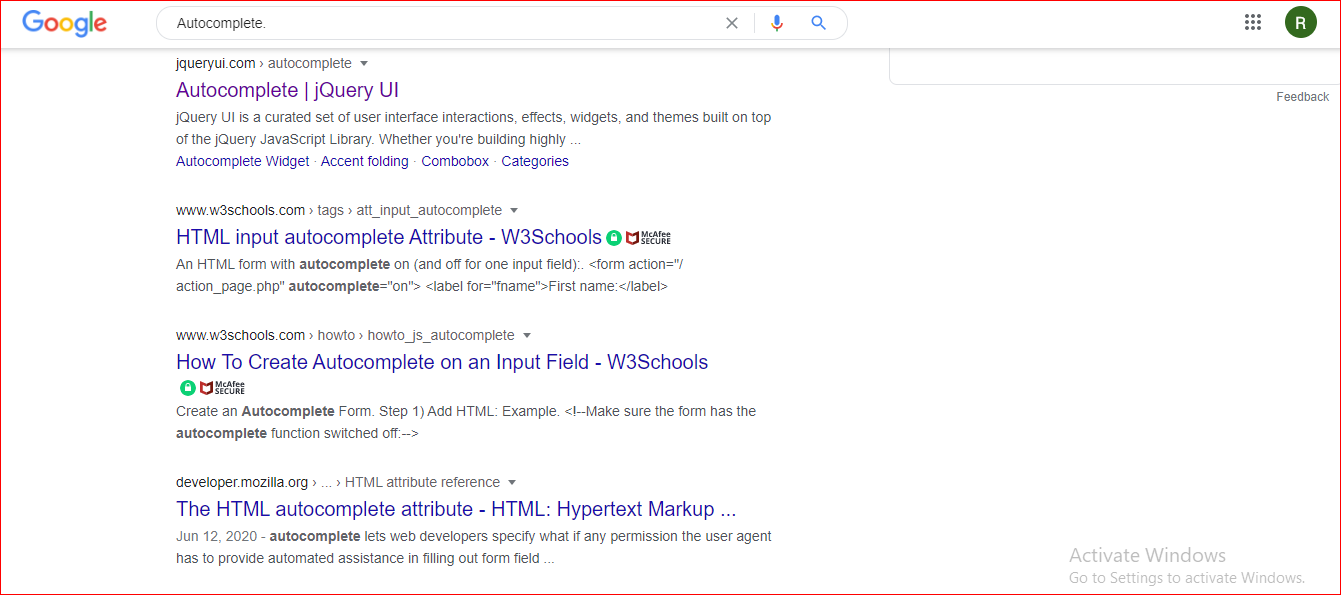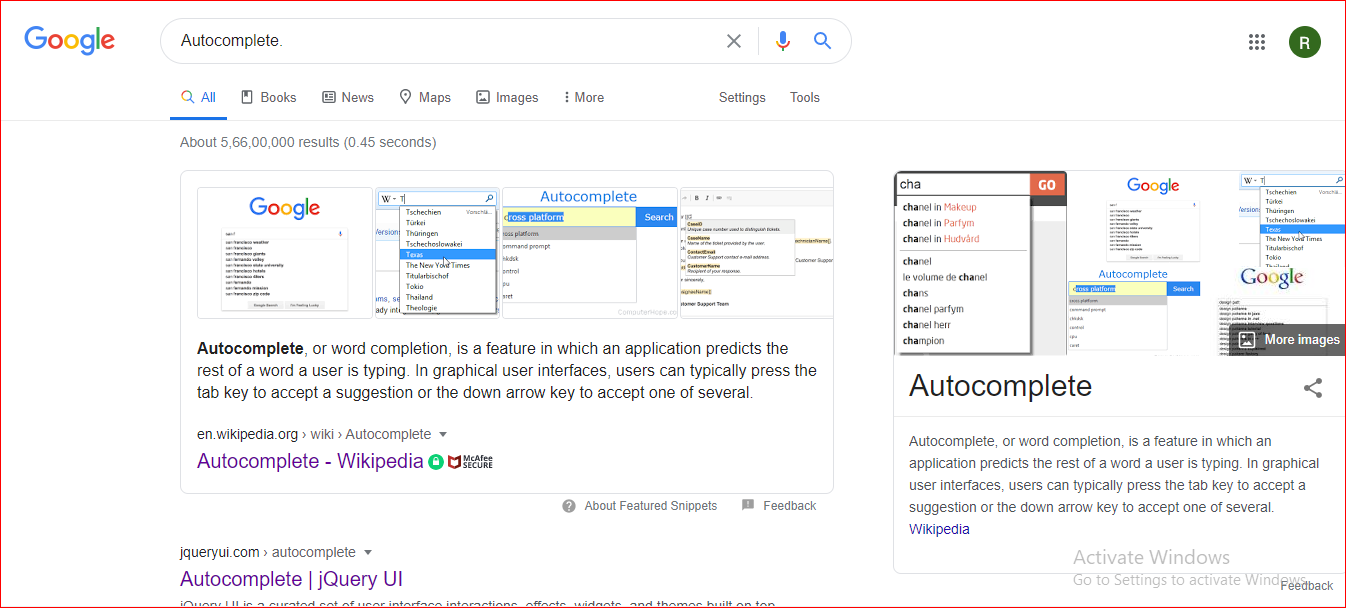
1. wikipedia   //https://en.wikipedia.org/wiki/Autocomplete#:~:text=Autocomplete%2C%20or%20word%20completion%2C%20is,to%20accept%20one%20of%20several.


2.   HTML input autocomplete Attribute
https://www.w3schools.com/tags/att_input_autocomplete.asp

3.   The HTML autocomplete attribute 


https://developer.mozilla.org/en-US/docs/Web/HTML/Attributes/autocomplete







Web Scrapping for For all three Links to Generate Data

In [75]:
url = "https://en.wikipedia.org/wiki/Autocomplete#:~:text=Autocomplete%2C%20or%20word%20completion%2C%20is,to%20accept%20one%20of%20several."
soup = extract_website(url)
text = extract_text_from_website(soup)
google_data = pre_process(text)

print("First Url data Lengths",len(google_data))


url = "https://www.w3schools.com/tags/att_input_autocomplete.asp"
soup = extract_website(url)
text = extract_text_from_website(soup)
google_data = google_data + pre_process(text)

print("First + Second Url data Lengths",len(google_data))


url = "https://developer.mozilla.org/en-US/docs/Web/HTML/Attributes/autocomplete"
soup = extract_website(url)
text = extract_text_from_website(soup)
google_data = google_data + pre_process(text)

print("First + Second + Third Url data Lengths",len(google_data))

First Url data Lengths 16942
First + Second Url data Lengths 22753
First + Second + Third Url data Lengths 36745


# Query search in "**Google Scholar search**"

Query : Autocomplete. 

Top Resultsweb3.PNG

In [76]:
# 1 > Providing autocomplete suggestions
download_file("https://patentimages.storage.googleapis.com/5e/ea/7f/69c6f89c9a2249/US8645825.pdf","Providing autocomplete suggestions")
from tika import parser
file = r'/content/Providing autocomplete suggestions.pdf'
file_data = parser.from_file(file)
text = file_data['content']
scholar_data = pre_process(text)

# 2 > Search entry system with query log autocomplete

download_file("https://patentimages.storage.googleapis.com/d9/7e/b5/ce2ce79a842dcd/US20080065617A1.pdf","Search entry system with query log autocomplete")
from tika import parser
file = r'/content/Search entry system with query log autocomplete.pdf'
file_data = parser.from_file(file)
text = file_data['content']
new_data = pre_process(text)
scholar_data = scholar_data + pre_process(text)

# 3 > Autocomplete method and apparatus for data file selection

download_file("https://patentimages.storage.googleapis.com/f4/40/17/5246677241e64d/US6751603.pdf","Autocomplete method and apparatus for data file selection")
from tika import parser
file = r'/content/Autocomplete method and apparatus for data file selection.pdf'
file_data = parser.from_file(file)
text = file_data['content']
text = pre_process(text)
new_text = clean(text)
scholar_data = scholar_data + pre_process(text)

Completed
Completed
Completed


In [77]:
# 1 Tokenize top all content then create a vocabulary.
from nltk.tokenize import word_tokenize 

vocabgoogle = word_tokenize(google_data)
vocabscholar = word_tokenize(scholar_data)


# 2 Find the frequency of all the words of vocabulary.
from collections import Counter

vocab_google = {}
vocab_scholar = {}

for val in vocabgoogle:
  if val not in vocab_google:
    vocab_google[val] = 0
  vocab_google[val] += 1

for val in vocabscholar:
  if val not in vocab_scholar:
    vocab_scholar[val] = 0
  vocab_scholar[val] += 1

# 3 Creating a vector of dimension vocab-size (for eash word) for both Google Search Data and Google Scolar Search. 
# Value of Dimension is Accoring to the frequency of the words
  
# form a set containing keywords of both strings  
rvector = vocabgoogle+vocabscholar  
length_google = []
length_scholar= []

for w in rvector: 
    if w in vocabgoogle: 
      length_google.append(vocab_google[w]) # create a vector 
    else: 
      length_google.append(0) 

    if w in vocabscholar:
      length_scholar.append(vocab_scholar[w]) 
    else: 
      length_scholar.append(0) 



#  My Own Conise similarity Checking
c = 0  
for i in range(len(rvector)): 
        c+= length_google[i]*length_scholar[i] 
cosine = c / float((sum(length_google)*sum(length_scholar))**0.5) 
print("similarity: ", cosine) 

#  Actual Conise similarity Checking

from numpy import dot
from numpy.linalg import norm
cos_sin = dot(length_google, length_scholar) / (norm(length_google) * norm(length_scholar))
print(cos_sin)

similarity:  67.7022267429411
0.6550974639358175
